In [1]:
import pystac_client
import planetary_computer

catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

In [3]:
time_range = "2020-12-01/2020-12-31"
bbox = [-122.2751, 47.5469, -121.9613, 47.7458]

search = catalog.search(collections=["landsat-c2-l2"], bbox=bbox, datetime=time_range)
items = search.get_all_items()
len(items)


8

In [4]:
area_of_interest = {
    "type": "Polygon",
    "coordinates": [
        [
            [-122.2751, 47.5469],
            [-121.9613, 47.9613],
            [-121.9613, 47.9613],
            [-122.2751, 47.9613],
            [-122.2751, 47.5469],
        ]
    ],
}

time_range = "2020-12-01/2020-12-31"

search = catalog.search(
    collections=["landsat-c2-l2"], intersects=area_of_interest, datetime=time_range
)

In [5]:
len(items)


8

### trying with Sharqeya bounds

In [7]:
time_range = "2020-12-01/2020-12-31"
#bbox = [-122.2751, 47.5469, -121.9613, 47.7458]
bbox = [31.2607, 30.1807, 32.2034, 31.1189]

search = catalog.search(collections=["landsat-c2-l2"], bbox=bbox, datetime=time_range)
items = search.get_all_items()
len(items)


16

In [8]:
area_of_interest = {
    "type": "Polygon",
    "coordinates": [
        [
            [31.27, 31.54],
            [32.2, 31.11],
            [31.3, 31.10],
            [31.32, 31.09],
            [32.1, 31.08],
        ]
    ],
}

time_range = "2020-12-01/2020-12-31"

search = catalog.search(
    collections=["landsat-c2-l2"], intersects=area_of_interest, datetime=time_range
)

In [9]:
import geopandas

df = geopandas.GeoDataFrame.from_features(items.to_dict(), crs="epsg:4326")
df


,geometry,gsd,created,sci:doi,datetime,platform,proj:epsg,proj:shape,description,instruments,...,landsat:wrs_row,landsat:scene_id,landsat:wrs_path,landsat:wrs_type,view:sun_azimuth,landsat:correction,view:sun_elevation,landsat:cloud_cover_land,landsat:collection_number,landsat:collection_category
0,"POLYGON ((31.20857 31.35060, 33.11148 30.97760...",30,2022-05-06T18:04:06.081370Z,10.5066/P9OGBGM6,2020-12-28T08:24:09.741496Z,landsat-8,32636,"[7851, 7701]",Landsat Collection 2 Level-2,"[oli, tirs]",...,039,LC81760392020363LGN00,176,2,155.492312,L2SP,32.273320,28.15,02,T1
1,"POLYGON ((31.57913 32.78734, 33.51233 32.41142...",30,2022-05-06T18:04:02.792123Z,10.5066/P9OGBGM6,2020-12-28T08:23:45.846221Z,landsat-8,32636,"[7841, 7701]",Landsat Collection 2 Level-2,"[oli, tirs]",...,038,LC81760382020363LGN00,176,2,156.136226,L2SP,31.062134,18.81,02,T1
2,"POLYGON ((29.51171 31.26186, 31.53135 30.97147...",30,2022-05-06T17:41:32.727914Z,10.5066/P9C7I13B,2020-12-27T07:48:51.054989Z,landsat-7,32636,"[7201, 8261]",Landsat Collection 2 Level-2,[etm+],...,039,LE71770392020362NPA00,177,2,145.783986,L2SP,27.839911,0.00,02,T1
3,"POLYGON ((29.87469 32.70420, 31.92620 32.40058...",30,2022-05-06T17:41:29.183377Z,10.5066/P9C7I13B,2020-12-27T07:48:27.161319Z,landsat-7,32636,"[7221, 8261]",Landsat Collection 2 Level-2,[etm+],...,038,LE71770382020362NPA00,177,2,146.441127,L2SP,26.778699,1.00,02,T1
4,"POLYGON ((31.05701 31.26830, 33.07691 30.96896...",30,2022-05-06T18:05:22.180640Z,10.5066/P9C7I13B,2020-12-20T07:43:10.035944Z,landsat-7,32636,"[7141, 8191]",Landsat Collection 2 Level-2,[etm+],...,039,LE71760392020355NPA00,176,2,146.740397,L2SP,28.198980,9.00,02,T1
5,"POLYGON ((31.42495 32.70215, 33.47370 32.40724...",30,2022-05-06T18:05:18.213951Z,10.5066/P9C7I13B,2020-12-20T07:42:46.142835Z,landsat-7,32636,"[7121, 8181]",Landsat Collection 2 Level-2,[etm+],...,038,LE71760382020355NPA00,176,2,147.399759,L2SP,27.123411,30.00,02,T1
6,"POLYGON ((29.65749 31.35094, 31.56109 30.97803...",30,2022-05-06T16:51:40.131648Z,10.5066/P9OGBGM6,2020-12-19T08:30:22.695740Z,landsat-8,32636,"[7921, 7781]",Landsat Collection 2 Level-2,"[oli, tirs]",...,039,LC81770392020354LGN00,177,2,156.692139,L2SP,32.505052,3.35,02,T1
7,"POLYGON ((30.02868 32.78719, 31.96180 32.41170...",30,2022-05-06T16:51:36.082421Z,10.5066/P9OGBGM6,2020-12-19T08:29:58.804700Z,landsat-8,32636,"[7901, 7771]",Landsat Collection 2 Level-2,"[oli, tirs]",...,038,LC81770382020354LGN00,177,2,157.324467,L2SP,31.277508,22.10,02,T1
8,"POLYGON ((31.20351 31.35107, 33.10677 30.97788...",30,2022-05-06T18:04:05.939471Z,10.5066/P9OGBGM6,2020-12-12T08:24:12.756526Z,landsat-8,32636,"[7841, 7711]",Landsat Collection 2 Level-2,"[oli, tirs]",...,039,LC81760392020347LGN00,176,2,157.428867,L2SP,33.076324,29.60,02,T1
9,"POLYGON ((31.57464 32.78756, 33.50754 32.41171...",30,2022-05-06T18:04:02.618801Z,10.5066/P9OGBGM6,2020-12-12T08:23:48.865487Z,landsat-8,32636,"[7841, 7701]",Landsat Collection 2 Level-2,"[oli, tirs]",...,038,LC81760382020347LGN00,176,2,158.062012,L2SP,31.838834,35.33,02,T1


In [10]:
selected_item = min(items, key=lambda item: item.properties["eo:cloud_cover"])
print(selected_item)


<Item id=LE07_L2SP_177039_20201227_02_T1>


In [11]:
import rich.table

table = rich.table.Table("Asset Key", "Description")
for asset_key, asset in selected_item.assets.items():
    table.add_row(asset_key, asset.title)

table


┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Asset Key        ┃ Description                                                      ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ qa               │ Surface Temperature Quality Assessment Band                      │
│ ang              │ Angle Coefficients File                                          │
│ red              │ Red Band                                                         │
│ blue             │ Blue Band                                                        │
│ drad             │ Downwelled Radiance Band                                         │
│ emis             │ Emissivity Band                                                  │
│ emsd             │ Emissivity Standard Deviation Band                               │
│ lwir             │ Surface Temperature Band                                         │
│ trad             │ Thermal Radiance Band                                            │
│ urad             │ Upwelled Radiance Band                                           │
│ atran            │ Atmospheric Transmittance Band                                   │
│ cdist            │ Cloud Distance Band                                              │
│ green            │ Green Band                                                       │
│ nir08            │ Near Infrared Band 0.8                                           │
│ swir16           │ Short-wave Infrared Band 1.6                                     │
│ swir22           │ Short-wave Infrared Band 2.2                                     │
│ mtl.txt          │ Product Metadata File (txt)                                      │
│ mtl.xml          │ Product Metadata File (xml)                                      │
│ cloud_qa         │ Cloud Quality Assessment Band                                    │
│ mtl.json         │ Product Metadata File (json)                                     │
│ qa_pixel         │ Pixel Quality Assessment Band                                    │
│ qa_radsat        │ Radiometric Saturation and Dropped Pixel Quality Assessment Band │
│ atmos_opacity    │ Atmospheric Opacity Band                                         │
│ tilejson         │ TileJSON with default rendering                                  │
│ rendered_preview │ Rendered preview                                                 │
└──────────────────┴──────────────────────────────────────────────────────────────────┘

In [12]:
selected_item.assets["rendered_preview"].to_dict()


{'href': 'https://planetarycomputer.microsoft.com/api/data/v1/item/preview.png?collection=landsat-c2-l2&item=LE07_L2SP_177039_20201227_02_T1&assets=red&assets=green&assets=blue&color_formula=gamma+RGB+2.7%2C+saturation+1.5%2C+sigmoidal+RGB+15+0.55&format=png',
 'type': 'image/png',
 'title': 'Rendered preview',
 'rel': 'preview',
 'roles': ['overview']}

In [13]:
from IPython.display import Image

Image(url=selected_item.assets["rendered_preview"].href, width=500)

In [14]:
selected_item.assets["blue"].href[:250]


'https://landsateuwest.blob.core.windows.net/landsat-c2/level-2/standard/etm/2020/177/039/LE07_L2SP_177039_20201227_20210122_02_T1/LE07_L2SP_177039_20201227_20210122_02_T1_SR_B1.TIF?st=2023-05-08T14%3A55%3A46Z&se=2023-05-09T15%3A40%3A46Z&sp=rl&sv=2021'

In [15]:
import requests

requests.head(selected_item.assets["blue"].href).status_code

200

In [36]:
!pip install xarray[complete]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 13.8 MB/s eta 0:00:00m eta 0:00:010:0101
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.3/203.3 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 57.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 55.8 MB/s eta 0:00:0031m95.2 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 10.7 MB/s eta 0:00:00m eta 0:00:010:00:01
  Created wheel for numpy-groupies: filename=numpy_groupies-0.9.22-py3-none-any.whl size=25846 sha256=9b1c23ed8699deb5e01389f17eaea8e2e73a292ba15a1f1c714d838b7f88226d
  Stored in directory: /home/hhammad/.cache/pip/wheels/5b/ce/73/9192b12bb05cc6a44ba159cb733270b1539004037302a42077
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5034 sha256=e6f705ec10ff61b9d1e03871654b3768fcfc6fdf9fe98c08b43e36fdb22bcec4
  Stored in directory: /home/hhammad/.cache/pip/wheels/7f/4e/be/1171b40f43b918087657ec57cf3b81fa1a2e027d8755baa184
Successfully built numpy-groupies asciitree


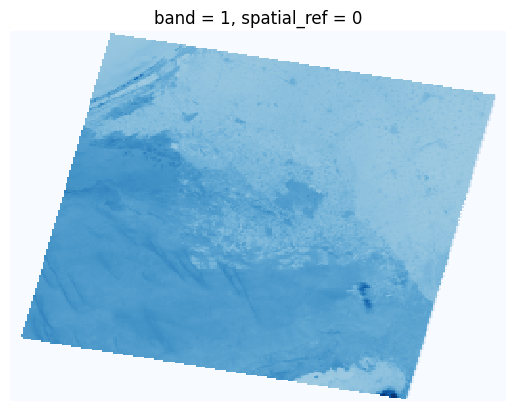

In [17]:
# import xarray as xr
import rioxarray

ds = rioxarray.open_rasterio(
    selected_item.assets["blue"].href, overview_level=4
).squeeze()
img = ds.plot(cmap="Blues", add_colorbar=False)
img.axes.set_axis_off();

In [18]:
!pip install stackstac

  Using cached stackstac-0.4.3-py3-none-any.whl (62 kB)


In [19]:
import stackstac

ds = stackstac.stack(items)
ds


<xarray.DataArray 'stackstac-ca8405e7b632c0c0548a3812c05be482' (time: 16,
                                                                band: 22,
                                                                y: 13242,
                                                                x: 14492)>
dask.array<fetch_raster_window, shape=(16, 22, 13242, 14492), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/31)
  * time                         (time) datetime64[ns] 2020-12-03T08:29:59.77...
    id                           (time) <U31 'LC08_L2SP_177038_20201203_02_T1...
  * band                         (band) <U13 'qa' 'red' ... 'atmos_opacity'
  * x                            (x) float64 1.164e+05 1.164e+05 ... 5.511e+05
  * y                            (y) float64 3.632e+06 3.632e+06 ... 3.235e+06
    platform                     (time) <U9 'landsat-8' ... 'landsat-8'
    ...                           ...
    raster:bands                 (band) object {'unit': 'kelvin', 'scale': 0....
    classification:bitfields     (band) object None None ... None
    common_name                  (band) object None None None ... None None
    center_wavelength            (band) object None None None ... None None
    full_width_half_max          (band) object None None None ... 2.05 None None
    epsg                         int64 32636
Attributes:
    spec:        RasterSpec(epsg=32636, bounds=(116370.0, 3234870.0, 551130.0...
    crs:         epsg:32636
    transform:   | 30.00, 0.00, 116370.00|\n| 0.00,-30.00, 3632130.00|\n| 0.0...
    resolution:  30.0

In [25]:
time_range = "2020-12-01/2020-12-31"
#bbox = [-122.2751, 47.5469, -121.9613, 47.7458]
bbox = [31.2607, 30.1807, 32.2034, 31.1189]

search = catalog.search(
    collections=["sentinel-2-l2a"],
    bbox=bbox,
    datetime=time_range,
    query={"eo:cloud_cover": {"lt": 20}},
)
items = search.get_all_items()

In [26]:
search = catalog.search(
    collections=["goes-cmi"],
    bbox=[-67.2729, 25.6000, -61.7999, 27.5423],
    datetime=["2018-09-11T13:00:00Z", "2018-09-11T15:40:00Z"],
    query={"goes:image-type": {"eq": "MESOSCALE"}},
)

In [22]:
!pip install contextily

  Using cached contextily-1.3.0-py3-none-any.whl (16 kB)
  Using cached geopy-2.3.0-py3-none-any.whl (119 kB)
  Using cached mercantile-1.2.1-py3-none-any.whl (14 kB)
  Using cached geographiclib-2.0-py3-none-any.whl (40 kB)


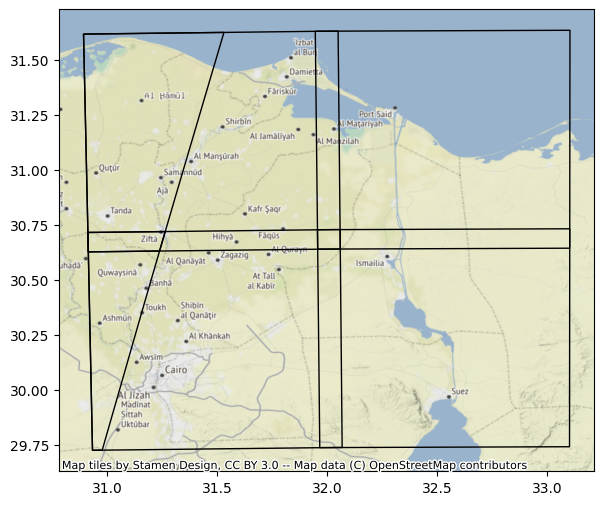

In [27]:
import contextily

search = catalog.search(
    collections=["sentinel-2-l2a"],
    #bbox=[-124.2751, 45.5469, -110.9613, 47.7458],
    bbox = [31.2607, 30.1807, 32.2034, 31.1189],
    
    datetime="2020-12-26/2020-12-31",
)
items = search.get_all_items()

df = geopandas.GeoDataFrame.from_features(items.to_dict(), crs="epsg:4326")

ax = df[["geometry", "datetime", "s2:mgrs_tile", "eo:cloud_cover"]].plot(
    facecolor="none", figsize=(12, 6)
)
contextily.add_basemap(ax, crs=df.crs.to_string());


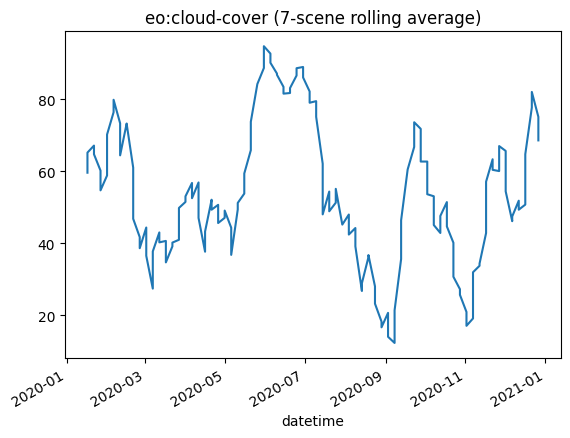

In [28]:
import pandas as pd

search = catalog.search(
    collections=["sentinel-2-l2a"],
    bbox=[-124.2751, 45.5469, -123.9613, 45.7458],
    datetime="2020-01-01/2020-12-31",
)
items = search.get_all_items()
df = geopandas.GeoDataFrame.from_features(items.to_dict())
df["datetime"] = pd.to_datetime(df["datetime"])

ts = df.set_index("datetime").sort_index()["eo:cloud_cover"].rolling(7).mean()
ts.plot(title="eo:cloud-cover (7-scene rolling average)");

In [31]:
import pandas as pd

landsat = catalog.get_collection("landsat-c2-l2")

pd.DataFrame(landsat.summaries.get_list("eo:bands"))

,name,common_name,description,center_wavelength,full_width_half_max
0,TM_B1,blue,Visible blue (Thematic Mapper),0.49,0.07
1,TM_B2,green,Visible green (Thematic Mapper),0.56,0.08
2,TM_B3,red,Visible red (Thematic Mapper),0.66,0.06
3,TM_B4,nir08,Near infrared (Thematic Mapper),0.83,0.14
4,TM_B5,swir16,Short-wave infrared (Thematic Mapper),1.65,0.20
5,TM_B6,lwir,Long-wave infrared (Thematic Mapper),11.45,2.10
6,TM_B7,swir22,Short-wave infrared (Thematic Mapper),2.22,0.27
7,ETM_B1,blue,Visible blue (Enhanced Thematic Mapper Plus),0.48,0.07
8,ETM_B2,green,Visible green (Enhanced Thematic Mapper Plus),0.56,0.08
9,ETM_B3,red,Visible red (Enhanced Thematic Mapper Plus),0.66,0.06


In [32]:
pd.DataFrame.from_dict(landsat.extra_fields["item_assets"], orient="index")[
    ["title", "description", "gsd"]
]

,title,description,gsd
qa,Surface Temperature Quality Assessment Band,Collection 2 Level-2 Quality Assessment Band (...,NaN
ang,Angle Coefficients File,Collection 2 Level-1 Angle Coefficients File,NaN
red,Red Band,NaN,NaN
blue,Blue Band,NaN,NaN
drad,Downwelled Radiance Band,Collection 2 Level-2 Downwelled Radiance Band ...,NaN
emis,Emissivity Band,Collection 2 Level-2 Emissivity Band (ST_EMIS)...,NaN
emsd,Emissivity Standard Deviation Band,Collection 2 Level-2 Emissivity Standard Devia...,NaN
lwir,Surface Temperature Band,Collection 2 Level-2 Thermal Infrared Band (ST...,NaN
trad,Thermal Radiance Band,Collection 2 Level-2 Thermal Radiance Band (ST...,NaN
urad,Upwelled Radiance Band,Collection 2 Level-2 Upwelled Radiance Band (S...,NaN


In [33]:
collection = catalog.get_collection("daymet-daily-na")
print(collection)

<CollectionClient id=daymet-daily-na>


In [34]:
asset = collection.assets["zarr-abfs"]
print(asset)

<Asset href=abfs://daymet-zarr/daily/na.zarr>


In [39]:
!pip install zarr

In [44]:
import xarray as xr

ds = xr.open_zarr(
    asset.href,
    **asset.extra_fields["xarray:open_kwargs"],
    storage_options=asset.extra_fields["xarray:storage_options"],
)
ds


ValueError: unrecognized engine zarr must be one of: ['scipy', 'rasterio', 'store']

In [41]:
xr.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.10.9 (main, Jan 11 2023, 15:21:40) [GCC 11.2.0]
python-bits: 64
OS: Linux
OS-release: 5.19.0-41-generic
machine: x86_64
processor: x86_64
byteorder: little
LC_ALL: None
LANG: en_US.UTF-8
LOCALE: ('en_US', 'UTF-8')
libhdf5: 1.12.2
libnetcdf: 4.9.1

xarray: 2023.4.2
pandas: 1.5.3
numpy: 1.24.2
scipy: 1.10.1
netCDF4: 1.6.3
pydap: None
h5netcdf: 1.1.0
h5py: 3.8.0
Nio: None
zarr: 2.14.2
cftime: 1.6.2
nc_time_axis: 1.4.1
PseudoNetCDF: None
iris: None
bottleneck: 1.3.5
dask: 2023.4.1
distributed: 2023.4.1
matplotlib: 3.7.1
cartopy: None
seaborn: 0.12.2
numbagg: 0.2.2
fsspec: 2023.4.0
cupy: None
pint: None
sparse: None
flox: 0.7.1
numpy_groupies: 0.9.22
setuptools: 67.7.2
pip: 23.1.2
conda: None
pytest: None
mypy: None
IPython: 8.12.0
sphinx: None


/home/hhammad/miniconda3/envs/stenv/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [42]:
import pystac

item = pystac.read_file(selected_item.get_self_href())
signed_item = planetary_computer.sign(item)  # these assets can be accessed
requests.head(signed_item.assets["blue"].href).status_code

200

In [43]:
collection = item.get_collection()
storage_account = collection.extra_fields["msft:storage_account"]
container = collection.extra_fields["msft:container"]

response = requests.get(
    f"https://planetarycomputer.microsoft.com/api/sas/v1/token/{collection.id}"
)

signed_url = item.assets["blue"].href + "?" + response.json()["token"]

requests.head(signed_url).status_code

200